## SHREE KRISHNA KANTH S
## 225229136
## PDML LAB3

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('C:\\Users\\shree\\OneDrive\\Documents\\heart_data.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.size

4242

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
X=df.drop('target',axis=1)
y=df['target']

In [9]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [10]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [11]:
#2. Split the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

In [12]:
training_data = np.array(X_train,"float32")
target_data = np.array(y_train, "float32")

In [13]:
#3. Create a neural network
model = Sequential()
model.add(Dense(8, input_dim=13, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
#4. Compile your model
model.compile(loss='mean_squared_error',
optimizer='RMSprop',
metrics=['accuracy'])

In [15]:
#5. Print the summary of the model:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
#6. Train the model
model.fit(training_data, target_data, epochs=100,batch_size=10, verbose=1)
print(model.predict(training_data).round())

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 11/

25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 84/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 85/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 86/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 87/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 88/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 89/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 90/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 91/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 92/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 93/100


In [17]:
#7. Save the trained model
history = model.fit(training_data, target_data, validation_split=0.2,epochs=100, batch_size=10, verbose=1)

Epoch 1/100
20/20 [==============================] - 0s 17ms/step - loss: 0.4404 - accuracy: 0.5596 - val_loss: 0.5306 - val_accuracy: 0.4694
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4404 - accuracy: 0.5596 - val_loss: 0.5306 - val_accuracy: 0.4694
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4404 - accuracy: 0.5596 - val_loss: 0.5306 - val_accuracy: 0.4694
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4404 - accuracy: 0.5596 - val_loss: 0.5306 - val_accuracy: 0.4694
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4404 - accuracy: 0.5596 - val_loss: 0.5306 - val_accuracy: 0.4694
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4404 - accuracy: 0.5596 - val_loss: 0.5306 - val_accuracy: 0.4694
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4404 - accuracy: 0.5596 - val_loss: 0.5306 - val_accuracy: 0.4694
Epoch 8/100


Epoch 59/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4404 - accuracy: 0.5596 - val_loss: 0.5306 - val_accuracy: 0.4694
Epoch 60/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4404 - accuracy: 0.5596 - val_loss: 0.5306 - val_accuracy: 0.4694
Epoch 61/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4404 - accuracy: 0.5596 - val_loss: 0.5306 - val_accuracy: 0.4694
Epoch 62/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4404 - accuracy: 0.5596 - val_loss: 0.5306 - val_accuracy: 0.4694
Epoch 63/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4404 - accuracy: 0.5596 - val_loss: 0.5306 - val_accuracy: 0.4694
Epoch 64/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4404 - accuracy: 0.5596 - val_loss: 0.5306 - val_accuracy: 0.4694
Epoch 65/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4404 - accuracy: 0.5596 - val_loss: 0.5306 - val_accuracy: 0.4694
Epoch 

In [18]:
#8. Evaluate
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.4426 - accuracy: 0.5574


[0.44262295961380005, 0.5573770403862]

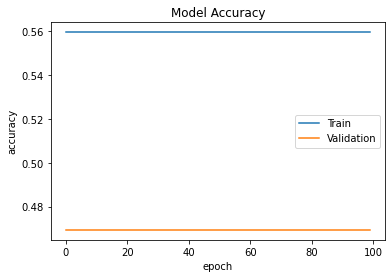

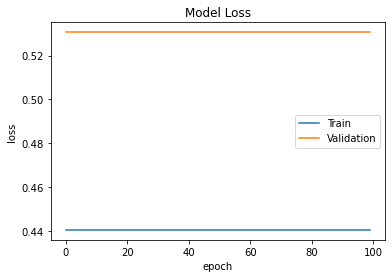

In [19]:
#9. Print the model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [20]:
model = Sequential()
model.add(Dense(16, input_dim=13, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',
optimizer='RMSprop',
metrics=['accuracy'])
model.fit(training_data, target_data, epochs=100,batch_size=10, verbose=1)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.3031 - accuracy: 0.5992
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2369 - accuracy: 0.6364
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2422 - accuracy: 0.6405
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2406 - accuracy: 0.6446
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2398 - accuracy: 0.6405
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2372 - accuracy: 0.6322
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2358 - accuracy: 0.6322
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2351 - accuracy: 0.6446
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2318 - accuracy: 0.6446
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2301 - accuracy: 0.6488
Epoch 11/

25/25 [==============================] - 0s 2ms/step - loss: 0.2052 - accuracy: 0.6942
Epoch 84/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1957 - accuracy: 0.7025
Epoch 85/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1989 - accuracy: 0.7107
Epoch 86/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1914 - accuracy: 0.7273
Epoch 87/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1952 - accuracy: 0.7355
Epoch 88/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1963 - accuracy: 0.7025
Epoch 89/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1929 - accuracy: 0.7149
Epoch 90/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1924 - accuracy: 0.7107
Epoch 91/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1936 - accuracy: 0.7314
Epoch 92/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1899 - accuracy: 0.7190
Epoch 93/100


In [21]:
#saving
history1 = model.fit(X_train, y_train, validation_split=0.2,epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
20/20 [==============================] - 1s 15ms/step - loss: 0.1882 - accuracy: 0.7306 - val_loss: 0.2265 - val_accuracy: 0.6531
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1876 - accuracy: 0.7513 - val_loss: 0.2171 - val_accuracy: 0.6531
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1902 - accuracy: 0.7306 - val_loss: 0.1816 - val_accuracy: 0.7143
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1871 - accuracy: 0.7513 - val_loss: 0.2055 - val_accuracy: 0.6531
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1956 - accuracy: 0.7150 - val_loss: 0.1875 - val_accuracy: 0.7143
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1791 - accuracy: 0.7513 - val_loss: 0.2130 - val_accuracy: 0.6531
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1886 - accuracy: 0.7306 - val_loss: 0.1930 - val_accuracy: 0.7143
Epoch 8/100


Epoch 59/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1672 - accuracy: 0.7720 - val_loss: 0.1960 - val_accuracy: 0.6735
Epoch 60/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1694 - accuracy: 0.7824 - val_loss: 0.1745 - val_accuracy: 0.7551
Epoch 61/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1683 - accuracy: 0.7617 - val_loss: 0.1704 - val_accuracy: 0.7755
Epoch 62/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1573 - accuracy: 0.7876 - val_loss: 0.2052 - val_accuracy: 0.6735
Epoch 63/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1703 - accuracy: 0.7617 - val_loss: 0.1709 - val_accuracy: 0.7551
Epoch 64/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1651 - accuracy: 0.7617 - val_loss: 0.1734 - val_accuracy: 0.7143
Epoch 65/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1610 - accuracy: 0.7876 - val_loss: 0.1708 - val_accuracy: 0.7143
Epoch 

In [22]:
model = Sequential()
model.add(Dense(32, input_dim=13, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',
optimizer='RMSprop',
metrics=['accuracy'])
model.fit(training_data, target_data, epochs=100,batch_size=10, verbose=1)
history = model.fit(X_train, y_train, validation_split=0.2,epochs=150, batch_size=15, verbose=1)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 11/

25/25 [==============================] - 0s 2ms/step - loss: 0.1835 - accuracy: 0.7397
Epoch 84/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1759 - accuracy: 0.7645
Epoch 85/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1783 - accuracy: 0.7686
Epoch 86/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1621 - accuracy: 0.7603
Epoch 87/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1621 - accuracy: 0.7727
Epoch 88/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1908 - accuracy: 0.7149
Epoch 89/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.8182
Epoch 90/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1894 - accuracy: 0.7231
Epoch 91/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1614 - accuracy: 0.7893
Epoch 92/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1600 - accuracy: 0.7727
Epoch 93/100


13/13 [==============================] - 0s 5ms/step - loss: 0.1789 - accuracy: 0.7668 - val_loss: 0.1000 - val_accuracy: 0.8367
Epoch 47/150
13/13 [==============================] - 0s 5ms/step - loss: 0.1472 - accuracy: 0.8187 - val_loss: 0.1090 - val_accuracy: 0.8163
Epoch 48/150
13/13 [==============================] - 0s 5ms/step - loss: 0.1522 - accuracy: 0.7927 - val_loss: 0.0976 - val_accuracy: 0.8367
Epoch 49/150
13/13 [==============================] - 0s 5ms/step - loss: 0.1569 - accuracy: 0.7876 - val_loss: 0.1101 - val_accuracy: 0.8163
Epoch 50/150
13/13 [==============================] - 0s 5ms/step - loss: 0.1745 - accuracy: 0.7824 - val_loss: 0.1067 - val_accuracy: 0.8367
Epoch 51/150
13/13 [==============================] - 0s 5ms/step - loss: 0.1589 - accuracy: 0.7979 - val_loss: 0.1237 - val_accuracy: 0.8367
Epoch 52/150
13/13 [==============================] - 0s 5ms/step - loss: 0.1358 - accuracy: 0.8238 - val_loss: 0.1452 - val_accuracy: 0.8163
Epoch 53/150
13/13 

Epoch 104/150
13/13 [==============================] - 0s 5ms/step - loss: 0.1387 - accuracy: 0.8083 - val_loss: 0.2407 - val_accuracy: 0.7143
Epoch 105/150
13/13 [==============================] - 0s 5ms/step - loss: 0.1451 - accuracy: 0.8187 - val_loss: 0.1124 - val_accuracy: 0.8163
Epoch 106/150
13/13 [==============================] - 0s 5ms/step - loss: 0.1300 - accuracy: 0.8290 - val_loss: 0.1128 - val_accuracy: 0.8571
Epoch 107/150
13/13 [==============================] - 0s 5ms/step - loss: 0.1466 - accuracy: 0.8031 - val_loss: 0.1088 - val_accuracy: 0.8571
Epoch 108/150
13/13 [==============================] - 0s 5ms/step - loss: 0.1281 - accuracy: 0.8394 - val_loss: 0.1081 - val_accuracy: 0.8571
Epoch 109/150
13/13 [==============================] - 0s 5ms/step - loss: 0.1684 - accuracy: 0.7927 - val_loss: 0.1069 - val_accuracy: 0.8367
Epoch 110/150
13/13 [==============================] - 0s 5ms/step - loss: 0.1513 - accuracy: 0.7824 - val_loss: 0.1449 - val_accuracy: 0.8163

In [23]:
model = Sequential()
model.add(Dense(64, input_dim=13, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',
optimizer='RMSprop',
metrics=['accuracy'])
model.fit(training_data, target_data, epochs=100,batch_size=10, verbose=1)
history = model.fit(X_train, y_train, validation_split=0.2,epochs=150, batch_size=20, verbose=1)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 11/

25/25 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 84/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 85/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 86/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 87/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 88/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 89/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 90/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 91/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 92/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 93/100


10/10 [==============================] - 0s 7ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 47/150
10/10 [==============================] - 0s 7ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 48/150
10/10 [==============================] - 0s 6ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 49/150
10/10 [==============================] - 0s 6ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 50/150
10/10 [==============================] - 0s 7ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 51/150
10/10 [==============================] - 0s 7ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 52/150
10/10 [==============================] - 0s 6ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 53/150
10/10 

Epoch 104/150
10/10 [==============================] - 0s 6ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 105/150
10/10 [==============================] - 0s 6ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 106/150
10/10 [==============================] - 0s 6ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 107/150
10/10 [==============================] - 0s 7ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 108/150
10/10 [==============================] - 0s 7ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 109/150
10/10 [==============================] - 0s 6ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 110/150
10/10 [==============================] - 0s 7ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306

In [24]:
model = Sequential()
model.add(Dense(64, input_dim=13, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',
optimizer='RMSprop',
metrics=['accuracy'])
model.fit(training_data, target_data, epochs=150,batch_size=15, verbose=1)
history = model.fit(X_train, y_train, validation_split=0.2,epochs=200, batch_size=15, verbose=1)

Epoch 1/150
17/17 [==============================] - 1s 2ms/step - loss: 0.4504 - accuracy: 0.5496
Epoch 2/150
17/17 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 3/150
17/17 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 4/150
17/17 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 5/150
17/17 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 6/150
17/17 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 7/150
17/17 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 8/150
17/17 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 9/150
17/17 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 10/150
17/17 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 11/

17/17 [==============================] - 0s 2ms/step - loss: 0.1621 - accuracy: 0.7727
Epoch 84/150
17/17 [==============================] - 0s 2ms/step - loss: 0.2020 - accuracy: 0.7231
Epoch 85/150
17/17 [==============================] - 0s 2ms/step - loss: 0.1877 - accuracy: 0.7273
Epoch 86/150
17/17 [==============================] - 0s 2ms/step - loss: 0.1774 - accuracy: 0.7810
Epoch 87/150
17/17 [==============================] - 0s 2ms/step - loss: 0.1759 - accuracy: 0.7603
Epoch 88/150
17/17 [==============================] - 0s 2ms/step - loss: 0.1634 - accuracy: 0.7727
Epoch 89/150
17/17 [==============================] - 0s 2ms/step - loss: 0.1901 - accuracy: 0.7562
Epoch 90/150
17/17 [==============================] - 0s 2ms/step - loss: 0.1930 - accuracy: 0.7562
Epoch 91/150
17/17 [==============================] - 0s 2ms/step - loss: 0.1645 - accuracy: 0.7893
Epoch 92/150
17/17 [==============================] - 0s 2ms/step - loss: 0.1666 - accuracy: 0.7893
Epoch 93/150


13/13 [==============================] - 0s 5ms/step - loss: 0.1299 - accuracy: 0.8135 - val_loss: 0.1065 - val_accuracy: 0.8367
Epoch 11/200
13/13 [==============================] - 0s 5ms/step - loss: 0.1334 - accuracy: 0.8031 - val_loss: 0.1881 - val_accuracy: 0.7347
Epoch 12/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1257 - accuracy: 0.8446 - val_loss: 0.1255 - val_accuracy: 0.8367
Epoch 13/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1223 - accuracy: 0.8187 - val_loss: 0.0801 - val_accuracy: 0.9388
Epoch 14/200
13/13 [==============================] - 0s 5ms/step - loss: 0.1428 - accuracy: 0.7927 - val_loss: 0.1282 - val_accuracy: 0.8163
Epoch 15/200
13/13 [==============================] - 0s 5ms/step - loss: 0.1246 - accuracy: 0.8238 - val_loss: 0.0901 - val_accuracy: 0.8163
Epoch 16/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1216 - accuracy: 0.8394 - val_loss: 0.0886 - val_accuracy: 0.8367
Epoch 17/200
13/13 

Epoch 68/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1298 - accuracy: 0.8135 - val_loss: 0.1472 - val_accuracy: 0.8163
Epoch 69/200
13/13 [==============================] - 0s 5ms/step - loss: 0.1162 - accuracy: 0.8187 - val_loss: 0.1200 - val_accuracy: 0.8163
Epoch 70/200
13/13 [==============================] - 0s 5ms/step - loss: 0.1201 - accuracy: 0.8187 - val_loss: 0.1251 - val_accuracy: 0.8163
Epoch 71/200
13/13 [==============================] - 0s 5ms/step - loss: 0.1079 - accuracy: 0.8394 - val_loss: 0.1385 - val_accuracy: 0.8163
Epoch 72/200
13/13 [==============================] - 0s 5ms/step - loss: 0.1188 - accuracy: 0.8238 - val_loss: 0.1084 - val_accuracy: 0.8163
Epoch 73/200
13/13 [==============================] - 0s 5ms/step - loss: 0.1377 - accuracy: 0.8290 - val_loss: 0.1118 - val_accuracy: 0.7959
Epoch 74/200
13/13 [==============================] - 0s 5ms/step - loss: 0.1135 - accuracy: 0.8238 - val_loss: 0.1245 - val_accuracy: 0.8163
Epoch 

13/13 [==============================] - 0s 5ms/step - loss: 0.1006 - accuracy: 0.8653 - val_loss: 0.0938 - val_accuracy: 0.8571
Epoch 126/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0978 - accuracy: 0.8653 - val_loss: 0.0945 - val_accuracy: 0.8571
Epoch 127/200
13/13 [==============================] - 0s 5ms/step - loss: 0.1058 - accuracy: 0.8446 - val_loss: 0.1279 - val_accuracy: 0.8367
Epoch 128/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1014 - accuracy: 0.8549 - val_loss: 0.1004 - val_accuracy: 0.8571
Epoch 129/200
13/13 [==============================] - 0s 5ms/step - loss: 0.1133 - accuracy: 0.8549 - val_loss: 0.1221 - val_accuracy: 0.8571
Epoch 130/200
13/13 [==============================] - 0s 5ms/step - loss: 0.1065 - accuracy: 0.8497 - val_loss: 0.1134 - val_accuracy: 0.8163
Epoch 131/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0965 - accuracy: 0.8653 - val_loss: 0.1282 - val_accuracy: 0.8367
Epoch 132/200

13/13 [==============================] - 0s 6ms/step - loss: 0.0902 - accuracy: 0.8860 - val_loss: 0.1232 - val_accuracy: 0.8163
Epoch 183/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0895 - accuracy: 0.8497 - val_loss: 0.1140 - val_accuracy: 0.8571
Epoch 184/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0961 - accuracy: 0.8705 - val_loss: 0.1566 - val_accuracy: 0.7755
Epoch 185/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0862 - accuracy: 0.8705 - val_loss: 0.1150 - val_accuracy: 0.8367
Epoch 186/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0814 - accuracy: 0.8964 - val_loss: 0.1019 - val_accuracy: 0.8980
Epoch 187/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0810 - accuracy: 0.8860 - val_loss: 0.1055 - val_accuracy: 0.8163
Epoch 188/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0886 - accuracy: 0.8756 - val_loss: 0.0955 - val_accuracy: 0.8163
Epoch 189/200

In [25]:
model = Sequential()
model.add(Dense(64, input_dim=13, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',
optimizer='RMSprop',
metrics=['accuracy'])
model.fit(training_data, target_data, epochs=200,batch_size=15, verbose=1)
history = model.fit(X_train, y_train, validation_split=0.2,epochs=200,batch_size=20 ,verbose=1)

Epoch 1/200
17/17 [==============================] - 1s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 11/

17/17 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 84/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 85/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 86/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 87/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 93/200


17/17 [==============================] - 0s 2ms/step - loss: 0.1848 - accuracy: 0.7231
Epoch 165/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.7851
Epoch 166/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1473 - accuracy: 0.7893
Epoch 167/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1681 - accuracy: 0.7686
Epoch 168/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1542 - accuracy: 0.7810
Epoch 169/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1693 - accuracy: 0.7562
Epoch 170/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1733 - accuracy: 0.7479
Epoch 171/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1484 - accuracy: 0.8017
Epoch 172/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1294 - accuracy: 0.8099
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1948 - accuracy: 0.7190
Epoc

10/10 [==============================] - 0s 7ms/step - loss: 0.1297 - accuracy: 0.8342 - val_loss: 0.1953 - val_accuracy: 0.7551
Epoch 33/200
10/10 [==============================] - 0s 6ms/step - loss: 0.1379 - accuracy: 0.8135 - val_loss: 0.1452 - val_accuracy: 0.8367
Epoch 34/200
10/10 [==============================] - 0s 6ms/step - loss: 0.1411 - accuracy: 0.7979 - val_loss: 0.0924 - val_accuracy: 0.8163
Epoch 35/200
10/10 [==============================] - 0s 6ms/step - loss: 0.1461 - accuracy: 0.7876 - val_loss: 0.1259 - val_accuracy: 0.8367
Epoch 36/200
10/10 [==============================] - 0s 6ms/step - loss: 0.1340 - accuracy: 0.8083 - val_loss: 0.2002 - val_accuracy: 0.7755
Epoch 37/200
10/10 [==============================] - 0s 7ms/step - loss: 0.1408 - accuracy: 0.7979 - val_loss: 0.1032 - val_accuracy: 0.8571
Epoch 38/200
10/10 [==============================] - 0s 7ms/step - loss: 0.1212 - accuracy: 0.8342 - val_loss: 0.0992 - val_accuracy: 0.8571
Epoch 39/200
10/10 

Epoch 90/200
10/10 [==============================] - 0s 7ms/step - loss: 0.1262 - accuracy: 0.8290 - val_loss: 0.0957 - val_accuracy: 0.8571
Epoch 91/200
10/10 [==============================] - 0s 6ms/step - loss: 0.1145 - accuracy: 0.8290 - val_loss: 0.1162 - val_accuracy: 0.8367
Epoch 92/200
10/10 [==============================] - 0s 6ms/step - loss: 0.1230 - accuracy: 0.8187 - val_loss: 0.1023 - val_accuracy: 0.8776
Epoch 93/200
10/10 [==============================] - 0s 6ms/step - loss: 0.1346 - accuracy: 0.8135 - val_loss: 0.1128 - val_accuracy: 0.8163
Epoch 94/200
10/10 [==============================] - 0s 6ms/step - loss: 0.1393 - accuracy: 0.8031 - val_loss: 0.1260 - val_accuracy: 0.8367
Epoch 95/200
10/10 [==============================] - 0s 6ms/step - loss: 0.1231 - accuracy: 0.8290 - val_loss: 0.1037 - val_accuracy: 0.7959
Epoch 96/200
10/10 [==============================] - 0s 7ms/step - loss: 0.1119 - accuracy: 0.8446 - val_loss: 0.1164 - val_accuracy: 0.7959
Epoch 

10/10 [==============================] - 0s 7ms/step - loss: 0.1154 - accuracy: 0.8549 - val_loss: 0.1007 - val_accuracy: 0.8163
Epoch 148/200
10/10 [==============================] - 0s 7ms/step - loss: 0.1025 - accuracy: 0.8601 - val_loss: 0.1080 - val_accuracy: 0.8776
Epoch 149/200
10/10 [==============================] - 0s 6ms/step - loss: 0.1118 - accuracy: 0.8601 - val_loss: 0.0939 - val_accuracy: 0.8980
Epoch 150/200
10/10 [==============================] - 0s 6ms/step - loss: 0.1468 - accuracy: 0.8031 - val_loss: 0.1061 - val_accuracy: 0.8163
Epoch 151/200
10/10 [==============================] - 0s 7ms/step - loss: 0.1003 - accuracy: 0.8601 - val_loss: 0.1046 - val_accuracy: 0.8776
Epoch 152/200
10/10 [==============================] - 0s 7ms/step - loss: 0.1249 - accuracy: 0.8342 - val_loss: 0.1090 - val_accuracy: 0.8163
Epoch 153/200
10/10 [==============================] - 0s 6ms/step - loss: 0.1097 - accuracy: 0.8497 - val_loss: 0.1719 - val_accuracy: 0.7755
Epoch 154/200

In [26]:
model = Sequential()
model.add(Dense(64, input_dim=13, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',
optimizer='RMSprop',
metrics=['accuracy'])
model.fit(training_data, target_data, epochs=300,batch_size=15, verbose=1)
history = model.fit(X_train, y_train, validation_split=0.2,epochs=300, batch_size=15, verbose=1)

Epoch 1/300
17/17 [==============================] - 1s 2ms/step - loss: 0.4676 - accuracy: 0.5289
Epoch 2/300
17/17 [==============================] - 0s 3ms/step - loss: 0.4658 - accuracy: 0.5248
Epoch 3/300
17/17 [==============================] - 0s 2ms/step - loss: 0.4612 - accuracy: 0.5331
Epoch 4/300
17/17 [==============================] - 0s 2ms/step - loss: 0.4580 - accuracy: 0.5413
Epoch 5/300
17/17 [==============================] - 0s 2ms/step - loss: 0.4586 - accuracy: 0.5413
Epoch 6/300
17/17 [==============================] - 0s 2ms/step - loss: 0.4585 - accuracy: 0.5413
Epoch 7/300
17/17 [==============================] - 0s 2ms/step - loss: 0.4556 - accuracy: 0.5413
Epoch 8/300
17/17 [==============================] - 0s 2ms/step - loss: 0.4652 - accuracy: 0.5248
Epoch 9/300
17/17 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.5372
Epoch 10/300
17/17 [==============================] - 0s 2ms/step - loss: 0.4187 - accuracy: 0.5702
Epoch 11/

17/17 [==============================] - 0s 2ms/step - loss: 0.1504 - accuracy: 0.7727
Epoch 84/300
17/17 [==============================] - 0s 2ms/step - loss: 0.1502 - accuracy: 0.7893
Epoch 85/300
17/17 [==============================] - 0s 2ms/step - loss: 0.1724 - accuracy: 0.7727
Epoch 86/300
17/17 [==============================] - 0s 2ms/step - loss: 0.1771 - accuracy: 0.7355
Epoch 87/300
17/17 [==============================] - 0s 2ms/step - loss: 0.1328 - accuracy: 0.8471
Epoch 88/300
17/17 [==============================] - 0s 2ms/step - loss: 0.1420 - accuracy: 0.7975
Epoch 89/300
17/17 [==============================] - 0s 2ms/step - loss: 0.1533 - accuracy: 0.8017
Epoch 90/300
17/17 [==============================] - 0s 2ms/step - loss: 0.1239 - accuracy: 0.8223
Epoch 91/300
17/17 [==============================] - 0s 2ms/step - loss: 0.1748 - accuracy: 0.7479
Epoch 92/300
17/17 [==============================] - 0s 2ms/step - loss: 0.1430 - accuracy: 0.8017
Epoch 93/300


17/17 [==============================] - 0s 2ms/step - loss: 0.1176 - accuracy: 0.8430
Epoch 165/300
17/17 [==============================] - 0s 2ms/step - loss: 0.1245 - accuracy: 0.8182
Epoch 166/300
17/17 [==============================] - 0s 2ms/step - loss: 0.1120 - accuracy: 0.8388
Epoch 167/300
17/17 [==============================] - 0s 2ms/step - loss: 0.1184 - accuracy: 0.8430
Epoch 168/300
17/17 [==============================] - 0s 2ms/step - loss: 0.1322 - accuracy: 0.8264
Epoch 169/300
17/17 [==============================] - 0s 2ms/step - loss: 0.1026 - accuracy: 0.8471
Epoch 170/300
17/17 [==============================] - 0s 2ms/step - loss: 0.1549 - accuracy: 0.7810
Epoch 171/300
17/17 [==============================] - 0s 2ms/step - loss: 0.1094 - accuracy: 0.8595
Epoch 172/300
17/17 [==============================] - 0s 2ms/step - loss: 0.1456 - accuracy: 0.7893
Epoch 173/300
17/17 [==============================] - 0s 2ms/step - loss: 0.1091 - accuracy: 0.8306
Epoc

17/17 [==============================] - 0s 2ms/step - loss: 0.1031 - accuracy: 0.8554
Epoch 246/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0975 - accuracy: 0.8678
Epoch 247/300
17/17 [==============================] - 0s 2ms/step - loss: 0.1132 - accuracy: 0.8471
Epoch 248/300
17/17 [==============================] - 0s 2ms/step - loss: 0.1024 - accuracy: 0.8554
Epoch 249/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0922 - accuracy: 0.8802
Epoch 250/300
17/17 [==============================] - 0s 2ms/step - loss: 0.1086 - accuracy: 0.8636
Epoch 251/300
17/17 [==============================] - 0s 2ms/step - loss: 0.1080 - accuracy: 0.8512
Epoch 252/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0937 - accuracy: 0.8760
Epoch 253/300
17/17 [==============================] - 0s 2ms/step - loss: 0.1011 - accuracy: 0.8471
Epoch 254/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0940 - accuracy: 0.8636
Epoc

13/13 [==============================] - 0s 6ms/step - loss: 0.0932 - accuracy: 0.8497 - val_loss: 0.0601 - val_accuracy: 0.9184
Epoch 20/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0973 - accuracy: 0.8653 - val_loss: 0.0714 - val_accuracy: 0.8980
Epoch 21/300
13/13 [==============================] - 0s 6ms/step - loss: 0.0840 - accuracy: 0.8964 - val_loss: 0.0957 - val_accuracy: 0.8571
Epoch 22/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0932 - accuracy: 0.8601 - val_loss: 0.0729 - val_accuracy: 0.8980
Epoch 23/300
13/13 [==============================] - 0s 6ms/step - loss: 0.0916 - accuracy: 0.8964 - val_loss: 0.0545 - val_accuracy: 0.9592
Epoch 24/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0863 - accuracy: 0.8653 - val_loss: 0.0692 - val_accuracy: 0.9184
Epoch 25/300
13/13 [==============================] - 0s 6ms/step - loss: 0.0937 - accuracy: 0.8653 - val_loss: 0.0690 - val_accuracy: 0.8980
Epoch 26/300
13/13 

Epoch 77/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0747 - accuracy: 0.8964 - val_loss: 0.1022 - val_accuracy: 0.8571
Epoch 78/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0775 - accuracy: 0.8808 - val_loss: 0.0618 - val_accuracy: 0.9184
Epoch 79/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0735 - accuracy: 0.8964 - val_loss: 0.0950 - val_accuracy: 0.8571
Epoch 80/300
13/13 [==============================] - 0s 6ms/step - loss: 0.0877 - accuracy: 0.8705 - val_loss: 0.0827 - val_accuracy: 0.8776
Epoch 81/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0775 - accuracy: 0.8756 - val_loss: 0.0679 - val_accuracy: 0.8980
Epoch 82/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0714 - accuracy: 0.8964 - val_loss: 0.0893 - val_accuracy: 0.8776
Epoch 83/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0669 - accuracy: 0.9119 - val_loss: 0.0712 - val_accuracy: 0.8980
Epoch 

13/13 [==============================] - 0s 5ms/step - loss: 0.0670 - accuracy: 0.9067 - val_loss: 0.0652 - val_accuracy: 0.9184
Epoch 135/300
13/13 [==============================] - 0s 6ms/step - loss: 0.0690 - accuracy: 0.8964 - val_loss: 0.0739 - val_accuracy: 0.8980
Epoch 136/300
13/13 [==============================] - 0s 6ms/step - loss: 0.0581 - accuracy: 0.9275 - val_loss: 0.0789 - val_accuracy: 0.8980
Epoch 137/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0800 - accuracy: 0.8756 - val_loss: 0.1353 - val_accuracy: 0.8163
Epoch 138/300
13/13 [==============================] - 0s 6ms/step - loss: 0.0734 - accuracy: 0.8860 - val_loss: 0.0810 - val_accuracy: 0.8980
Epoch 139/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0673 - accuracy: 0.9067 - val_loss: 0.1175 - val_accuracy: 0.8571
Epoch 140/300
13/13 [==============================] - 0s 6ms/step - loss: 0.0616 - accuracy: 0.9275 - val_loss: 0.0753 - val_accuracy: 0.8980
Epoch 141/300

13/13 [==============================] - 0s 5ms/step - loss: 0.0551 - accuracy: 0.9223 - val_loss: 0.0992 - val_accuracy: 0.8367
Epoch 192/300
13/13 [==============================] - 0s 6ms/step - loss: 0.0547 - accuracy: 0.9119 - val_loss: 0.1190 - val_accuracy: 0.8571
Epoch 193/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0514 - accuracy: 0.9378 - val_loss: 0.0972 - val_accuracy: 0.8776
Epoch 194/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0511 - accuracy: 0.9326 - val_loss: 0.0716 - val_accuracy: 0.8776
Epoch 195/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0592 - accuracy: 0.9067 - val_loss: 0.0966 - val_accuracy: 0.8776
Epoch 196/300
13/13 [==============================] - 0s 6ms/step - loss: 0.0632 - accuracy: 0.9223 - val_loss: 0.0634 - val_accuracy: 0.8776
Epoch 197/300
13/13 [==============================] - 0s 6ms/step - loss: 0.0531 - accuracy: 0.9223 - val_loss: 0.0796 - val_accuracy: 0.8776
Epoch 198/300

13/13 [==============================] - 0s 5ms/step - loss: 0.0607 - accuracy: 0.9171 - val_loss: 0.1143 - val_accuracy: 0.8367
Epoch 249/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0395 - accuracy: 0.9585 - val_loss: 0.0858 - val_accuracy: 0.8367
Epoch 250/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0500 - accuracy: 0.9326 - val_loss: 0.1071 - val_accuracy: 0.8571
Epoch 251/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0519 - accuracy: 0.9378 - val_loss: 0.0879 - val_accuracy: 0.8571
Epoch 252/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0328 - accuracy: 0.9689 - val_loss: 0.0976 - val_accuracy: 0.8163
Epoch 253/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0368 - accuracy: 0.9534 - val_loss: 0.1090 - val_accuracy: 0.8163
Epoch 254/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.9689 - val_loss: 0.1219 - val_accuracy: 0.8367
Epoch 255/300

In [27]:
model = Sequential()
model.add(Dense(64, input_dim=13, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',
optimizer='RMSprop',
metrics=['accuracy'])
model.fit(training_data, target_data, epochs=300,batch_size=15, verbose=1)
history = model.fit(X_train, y_train, validation_split=0.2,epochs=300, batch_size=20, verbose=1)

Epoch 1/300
17/17 [==============================] - 1s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 2/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 3/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 4/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 5/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 6/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 7/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 8/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 9/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 10/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 11/

17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 84/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 85/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 86/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 87/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 88/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 89/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 90/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 91/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 92/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 93/300


17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 165/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 166/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 167/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 168/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 169/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 170/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 171/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 172/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 173/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoc

17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 246/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 247/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 248/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 249/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 250/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 251/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 252/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 253/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 254/300
17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.4587
Epoc

10/10 [==============================] - 0s 8ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 20/300
10/10 [==============================] - 0s 6ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 21/300
10/10 [==============================] - 0s 6ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 22/300
10/10 [==============================] - 0s 7ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 23/300
10/10 [==============================] - 0s 8ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 24/300
10/10 [==============================] - 0s 6ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 25/300
10/10 [==============================] - 0s 7ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 26/300
10/10 

Epoch 77/300
10/10 [==============================] - 0s 6ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 78/300
10/10 [==============================] - 0s 7ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 79/300
10/10 [==============================] - 0s 6ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 80/300
10/10 [==============================] - 0s 7ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 81/300
10/10 [==============================] - 0s 8ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 82/300
10/10 [==============================] - 0s 7ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 83/300
10/10 [==============================] - 0s 8ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 

10/10 [==============================] - 0s 7ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 135/300
10/10 [==============================] - 0s 7ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 136/300
10/10 [==============================] - 0s 7ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 137/300
10/10 [==============================] - 0s 7ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 138/300
10/10 [==============================] - 0s 6ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 139/300
10/10 [==============================] - 0s 7ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 140/300
10/10 [==============================] - 0s 8ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 141/300

10/10 [==============================] - 0s 7ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 192/300
10/10 [==============================] - 0s 7ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 193/300
10/10 [==============================] - 0s 7ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 194/300
10/10 [==============================] - 0s 6ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 195/300
10/10 [==============================] - 0s 7ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 196/300
10/10 [==============================] - 0s 7ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 197/300
10/10 [==============================] - 0s 7ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 198/300

10/10 [==============================] - 0s 6ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 249/300
10/10 [==============================] - 0s 7ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 250/300
10/10 [==============================] - 0s 6ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 251/300
10/10 [==============================] - 0s 6ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 252/300
10/10 [==============================] - 0s 7ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 253/300
10/10 [==============================] - 0s 8ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 254/300
10/10 [==============================] - 0s 8ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 255/300

In [28]:
model = Sequential()
model.add(Dense(8, input_dim=13, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer='RMSprop',
metrics=['accuracy'])
model.fit(training_data, target_data, epochs=100,batch_size=10, verbose=1)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 33.6031 - accuracy: 0.4587
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 15.5372 - accuracy: 0.4587
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 3.0838 - accuracy: 0.3926
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 1.7696 - accuracy: 0.3884
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 1.4835 - accuracy: 0.4174
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 1.3166 - accuracy: 0.4298
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 1.1846 - accuracy: 0.4793
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 1.1339 - accuracy: 0.4835
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.9933 - accuracy: 0.5620
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.9228 - accuracy: 0.5579
Epoch 1

Epoch 83/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4371 - accuracy: 0.7975
Epoch 84/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4390 - accuracy: 0.8140
Epoch 85/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4317 - accuracy: 0.8223
Epoch 86/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4400 - accuracy: 0.7893
Epoch 87/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.8099
Epoch 88/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4593 - accuracy: 0.7686
Epoch 89/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4258 - accuracy: 0.8306
Epoch 90/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4423 - accuracy: 0.8058
Epoch 91/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4364 - accuracy: 0.7934
Epoch 92/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3954 - accuracy: 0.8182


In [29]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.6807 - accuracy: 0.5902


[0.6807102560997009, 0.5901639461517334]

<function matplotlib.pyplot.show(close=None, block=None)>

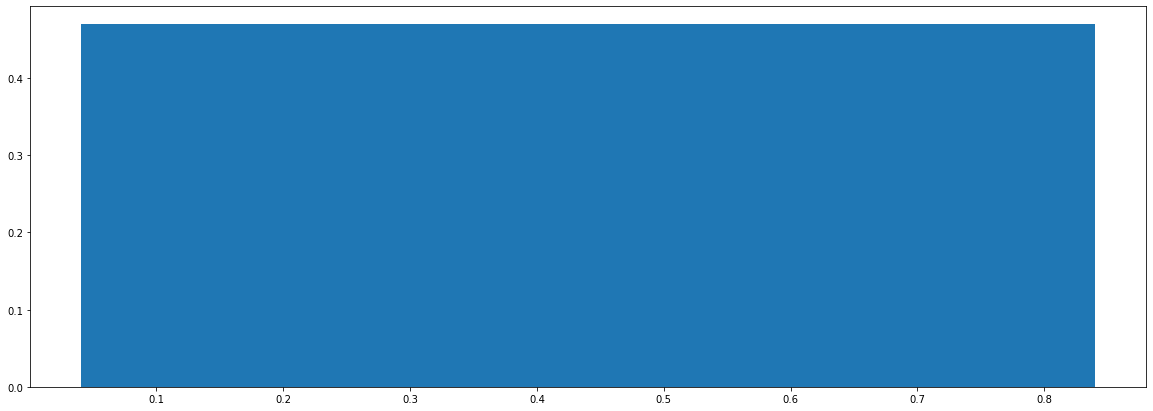

In [30]:
fig = plt.figure(figsize =(20, 7))
plt.bar(history.history['accuracy'],history.history['val_loss'])
plt.show